In [1]:
%matplotlib inline 
#%matplotlib notebook
#matplotlib widget
%reload_ext autoreload
%autoreload 2

In [2]:
import random            as random
import numpy             as np
import pandas            as pd
#import tables            as tb
import matplotlib.pyplot as plt
import os 

In [3]:
import xyimg.dataprep as dp
import xyimg.cnn      as cnn

## Config

In [4]:
path  = os.environ['LPRDATADIR']
shots = True


pressure  = '5bar'
hit_width = 0 # mm
sigma     = 0 # mm
width     = 10  #mm
ifile    = path  + 'shots/' + dp.filename_godata(pressure, 'shuffle', hit_width, sigma, width)
#ifile0    = path + 'xymm/' + 'xymm_5bar_xy_10x10_304.npz'
#ifile     = ifile1 if shots else ifile0


igodata = dp.godata_load(ifile)

#cnn.test(ifile)

y   1
id  [ 94 212]


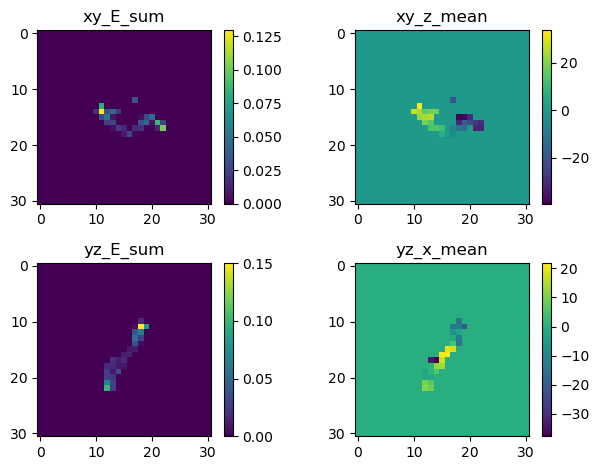

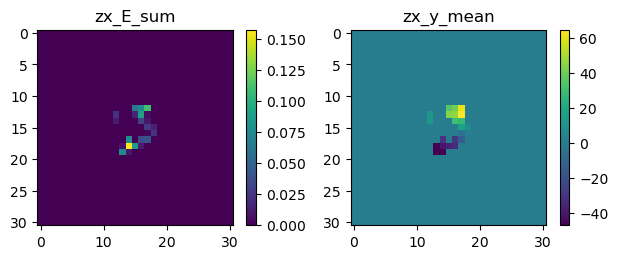

<Figure size 640x480 with 0 Axes>

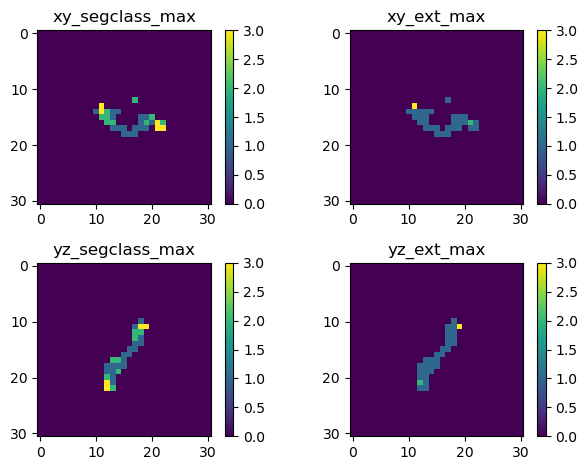

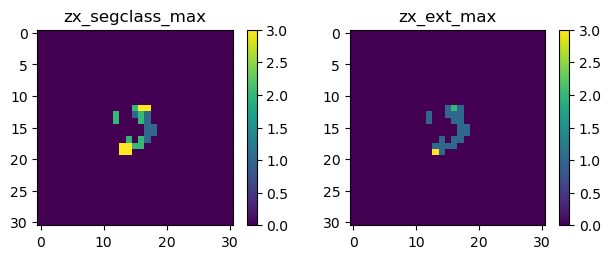

<Figure size 640x480 with 0 Axes>

In [5]:
ii = 2
dp.plot_godata(igodata, ii)

In [12]:
def plot_ana_img(xs, ys):
    plt.figure()
    xlabel = ['sum', 'len', 'max', 'std']
    for i, _sta in enumerate((np.sum, len, np.mean, np.std)):
        plt.subplot(2, 2, i+1)
        for iy in (0, 1):
            var = [_sta(xi[xi != 0].flatten()) for xi, yi in zip(xs, ys) if yi == iy]
            plt.hist(var, 100, density = True, label = str(iy), alpha = 0.5)
            print(xlabel[i], np.mean(var), np.std(var))
            plt.xlabel(xlabel[i])
        plt.legend()
    plt.tight_layout()

    plt.figure()
    xlabel = ('i-mean', 'j-mean')
    for i in range(2):
        plt.subplot(2, 2, i+1)
        for iy in (0, 1):
            var = [float(np.mean(np.argwhere(xi != 0), axis = 0)[i]) for xi, yi in zip(xs, ys) if (yi == iy)]
            print(xlabel[i], np.mean(var), np.std(var))
            plt.hist(var, 100, label = str(iy), alpha = 0.5)
        plt.legend()
        plt.xlabel(xlabel[i])
    plt.tight_layout()

    return


In [13]:
label = 'xy_E_sum'
black = True
xs = igodata.xdic[label]
ys = igodata.y
if black: xs = xs > 0
plot_ana_img(xs, ys)

/tmp/ipykernel_1995831/1276891274.py:9: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(xlabel[i], np.mean(var), np.str(var))


sum 29.457460528012675 [41, 21, 35, 28, 34, 22, 24, 32, 32, 32, 27, 32, 28, 26, 42, 29, 28, 32, 31, 25, 26, 36, 25, 25, 34, 31, 25, 36, 33, 26, 30, 31, 34, 24, 29, 38, 29, 24, 32, 23, 30, 25, 27, 26, 34, 37, 37, 26, 31, 37, 18, 30, 30, 17, 34, 23, 23, 35, 25, 25, 29, 25, 21, 22, 28, 35, 27, 26, 23, 41, 31, 37, 39, 19, 36, 16, 29, 31, 28, 22, 25, 40, 29, 24, 34, 29, 41, 23, 23, 29, 37, 33, 25, 28, 24, 27, 37, 34, 30, 32, 23, 26, 33, 35, 36, 34, 35, 38, 24, 24, 35, 18, 29, 24, 38, 35, 35, 25, 27, 29, 26, 28, 23, 28, 26, 26, 27, 24, 27, 31, 29, 27, 28, 34, 36, 35, 37, 23, 32, 33, 32, 28, 31, 32, 21, 33, 28, 18, 25, 31, 26, 28, 25, 26, 40, 36, 34, 31, 35, 42, 28, 35, 35, 39, 22, 31, 32, 36, 25, 32, 26, 26, 28, 26, 21, 25, 30, 31, 38, 26, 27, 25, 30, 31, 31, 27, 39, 35, 36, 30, 33, 32, 31, 22, 25, 35, 19, 31, 29, 29, 25, 32, 38, 32, 34, 25, 29, 38, 36, 26, 33, 31, 25, 31, 37, 41, 38, 30, 25, 20, 33, 25, 37, 23, 35, 22, 28, 33, 27, 28, 29, 27, 19, 27, 28, 37, 28, 30, 34, 37, 31, 29, 38, 27, 

len 24.345978611052864 [31, 33, 27, 13, 29, 21, 16, 18, 26, 23, 16, 24, 21, 19, 23, 24, 20, 19, 31, 25, 34, 33, 24, 24, 21, 26, 31, 25, 19, 18, 14, 23, 26, 20, 22, 29, 21, 18, 26, 20, 20, 26, 34, 23, 25, 27, 19, 20, 27, 22, 23, 13, 17, 26, 22, 26, 23, 27, 19, 23, 28, 16, 32, 28, 30, 26, 27, 22, 25, 20, 25, 21, 20, 33, 27, 22, 29, 30, 28, 22, 33, 29, 20, 17, 28, 23, 22, 28, 36, 33, 24, 26, 30, 20, 14, 30, 19, 40, 34, 26, 27, 16, 16, 21, 22, 28, 21, 26, 24, 27, 22, 20, 27, 22, 21, 26, 34, 19, 19, 22, 20, 29, 23, 33, 20, 23, 17, 28, 26, 30, 23, 31, 23, 25, 25, 20, 24, 27, 37, 20, 37, 22, 21, 32, 26, 29, 27, 21, 32, 18, 23, 26, 21, 32, 22, 17, 25, 29, 27, 23, 16, 15, 18, 21, 21, 28, 23, 29, 18, 26, 29, 26, 24, 34, 22, 29, 21, 30, 27, 26, 28, 22, 31, 26, 23, 23, 20, 26, 24, 31, 28, 27, 18, 30, 29, 23, 29, 32, 23, 24, 28, 21, 24, 28, 35, 24, 24, 18, 22, 22, 22, 20, 21, 19, 21, 23, 24, 22, 35, 29, 23, 18, 24, 26, 18, 27, 25, 27, 19, 30, 39, 19, 19, 30, 22, 14, 33, 25, 24, 26, 26, 26, 14, 16, 

/tmp/ipykernel_1995831/1276891274.py:20: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(xlabel[i], np.mean(var), np.str(var))


i-mean 15.499328687722569 [15.512195121951219, 15.523809523809524, 15.228571428571428, 15.678571428571429, 15.764705882352942, 15.045454545454545, 15.416666666666666, 15.90625, 15.125, 15.25, 15.444444444444445, 15.1875, 16.0, 15.5, 15.642857142857142, 16.655172413793103, 16.178571428571427, 15.4375, 15.419354838709678, 16.08, 15.5, 15.805555555555555, 15.6, 15.76, 15.588235294117647, 15.0, 15.28, 15.75, 15.121212121212121, 14.653846153846153, 15.633333333333333, 14.870967741935484, 16.38235294117647, 15.458333333333334, 15.068965517241379, 15.447368421052632, 15.758620689655173, 15.458333333333334, 14.90625, 15.434782608695652, 15.3, 15.28, 14.62962962962963, 15.576923076923077, 16.264705882352942, 15.297297297297296, 15.675675675675675, 14.615384615384615, 15.35483870967742, 15.297297297297296, 15.5, 16.133333333333333, 15.566666666666666, 15.176470588235293, 16.029411764705884, 15.478260869565217, 15.478260869565217, 16.02857142857143, 15.68, 15.56, 14.89655172413793, 16.36, 15.3809

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



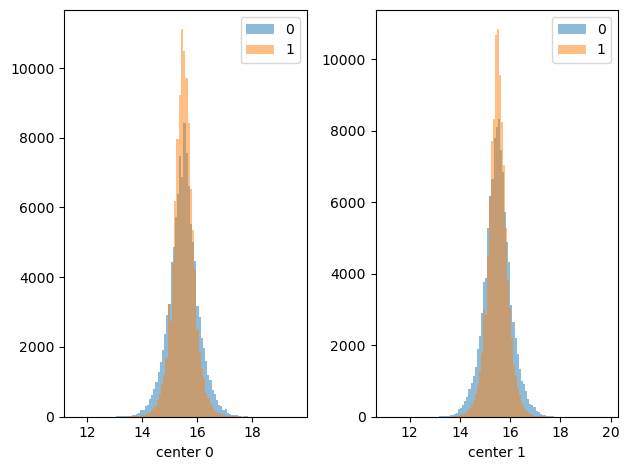

In [17]:
xs = igodata.xdic['xy_E_sum']
ys = igodata.y
for i in range(2):
    plt.subplot(1, 2, i+1)
    for iy in (0, 1):
        ic = [float(np.mean(np.argwhere(xi != 0), axis = 0)[i]) for xi, yi in zip(xs, ys) if (yi == iy)]
        plt.subplot(1, 2, i+1); plt.hist(ic, 100, label = str(iy), alpha = 0.5)
    plt.legend()
    plt.xlabel('center '+str(i))
plt.tight_layout()

In [15]:
var[0]

array([15.70967742, 15.90322581])

In [8]:
ipath = os.environ['LPRDATADIR']
ifile1 = ipath + 'xymm/' + 'xymm_5bar_xy_10x10_304.npz'
idata1 = dp.godata_load(ifile1)

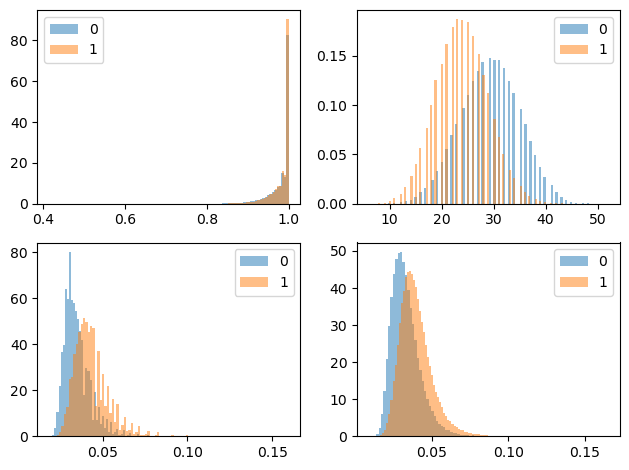

In [9]:
godata_ana(idata1.xdic['esum'], idata1.y)


In [39]:
idata0 = igodata # rename it

In [32]:
def get_event(data0, ievt, data):
    fileid, evt = data0.id[ievt]
    print('file, event : ', data0.id[ievt])
    id = np.squeeze(data.id, axis = 2)
    ii = [i for i in range(id.shape[0]) if ((id[i][0] == fileid) & (id[i][1] == evt))]
    print('found ', ii)
    kevt = ii[0]
    print('file, event : ', id[kevt])
    return kevt

y   0
id  [790  26]
file, event :  [790  26]
found  [110864]
file, event :  [790  26]
y   [0]
id  [[790]
 [ 26]]


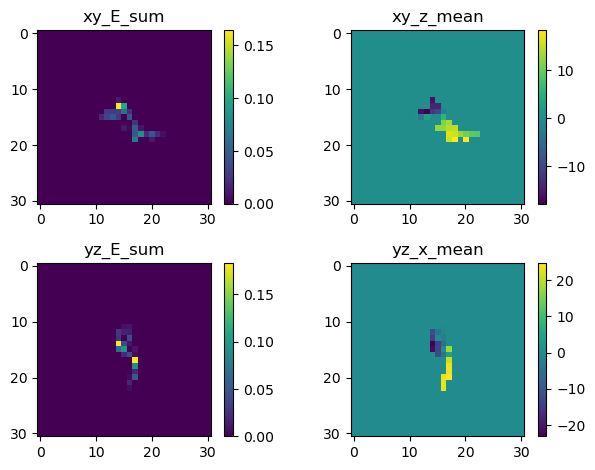

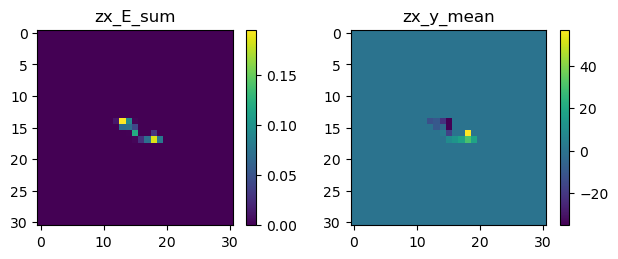

<Figure size 640x480 with 0 Axes>

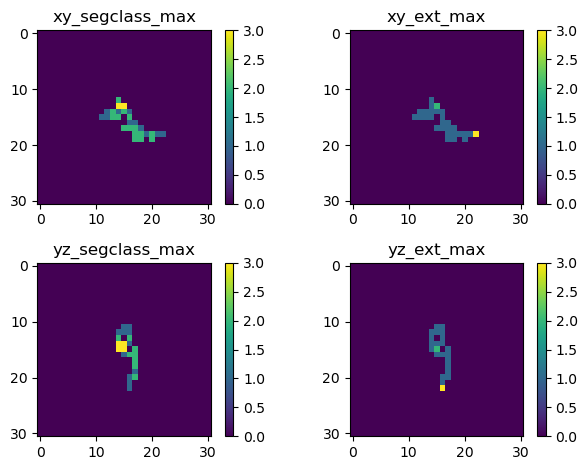

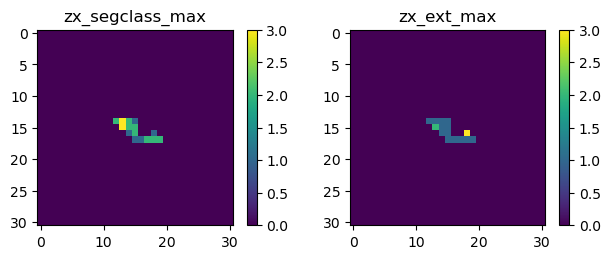

<Figure size 640x480 with 0 Axes>

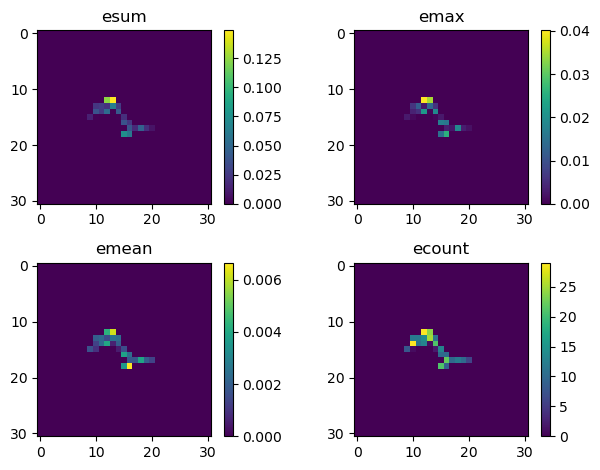

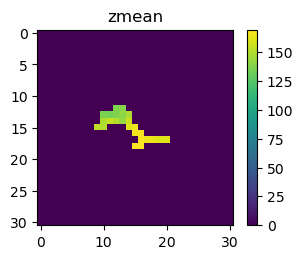

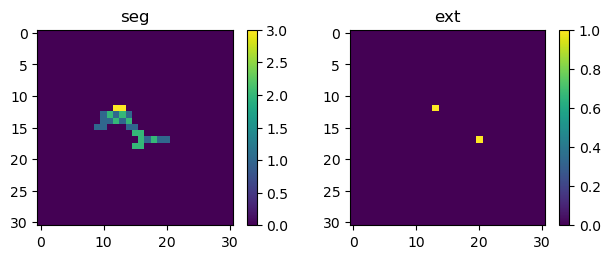

<Figure size 640x480 with 0 Axes>

In [41]:
ievt = 20
dp.plot_godata(idata0, ievt)
kevt = get_event(idata0, ievt, idata1)
dp.plot_godata(idata1, kevt)

0.1489640958402991 0.16437257022127075
0.0009934226482166205 0.001040582726326743
0.9546791649361722 1.0
[0] 0


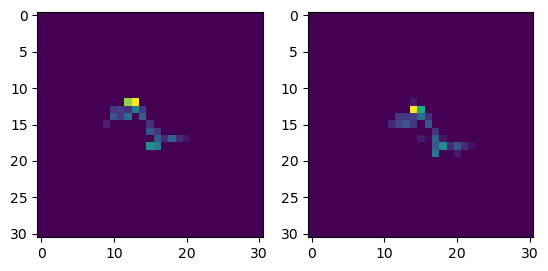

In [42]:
x1 = idata1.xdic['esum'][kevt]
x2 = idata0.xdic['xy_E_sum'][ievt]
plt.subplot(1, 2, 1); plt.imshow(x1)
plt.subplot(1, 2, 2); plt.imshow(x2)
print(np.max(x1), np.max(x2))
print(np.mean(x1), np.mean(x2))
print(np.sum(x1), np.sum(x2))
print(idata1.y[kevt], idata0.y[ievt])



## RUN CNN

In [13]:
ipath = os.environ['LPRDATADIR']
opath = 'temp/'

pressure   = '5bar'
hit_width  = 0
sigma      = 0
width      = 10
labels     = ['esum']
cnn_name   = 'temp_cnn'
nepochs    = 5
config     = cnn.config
config['loss_function'] = 'MSELoss' # 'MSELoss', 'chi2'

#idata, odata = cnn.production(ifilename, labels, nepochs = nepochs, cnn_name = cnn_name, config = config)


In [36]:
ifile  = ipath + 'shots/'+ dp.filename_godata(pressure, 'shuffle', hit_width, sigma, width)
#ifile  = ipath + 'xymm/' + 'xymm_5bar_xy_10x10_304.npz'   

labels     = ['esum'] if ifile.find('xymm') > 0 else ['xy_E_sum']
print(ifile)
ofile = cnn.cnn_filename(ifile, labels, cnn_name)
print(ofile)
Dset  = cnn.get_dset(labels)
print(Dset)
idata = Dset(ifile, labels)
#    box     = run(idata, ofilename = ofile, nepochs = nepochs, config = config)


/scratch/next/data/NEXT100/pressure_topology/shots/5bar_shuffle_h0mm_s0mm_w10mm.npz
/scratch/next/data/NEXT100/pressure_topology/shots/5bar_shuffle_h0mm_s0mm_w10mm_temp_cnn_xy_E_sum.npz
<class 'xyimg.cnn.GoDataset'>


In [37]:
idata.z.shape

(213472, 6, 31, 31)

 target  0.0
[1272   23]


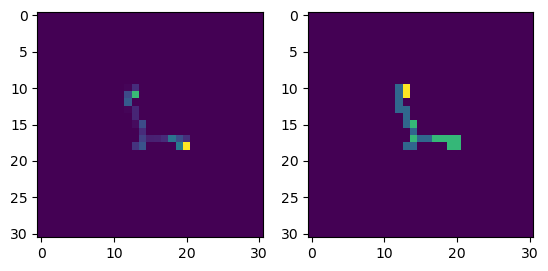

In [39]:
ii = 7
xi, yi = idata[ii]
print(' target ', yi.numpy())
plt.subplot(1, 2, 1)
plt.imshow(xi.numpy()[0])
plt.subplot(1, 2, 2)
plt.imshow(idata.z[ii, 0])
print(idata.id[ii])

In [40]:
def get_event_(data0, ievt, data1):
    fileid, evt = data0.id[ievt]
    print('file, event : ', data0.id[ievt])
    id = data1.id
    ii = [i for i in range(id.shape[0]) if ((id[i][0] == fileid) & (id[i][1] == evt))]
    print('found ', ii)
    kevt = ii[0]
    print('file, event : ', id[kevt])
    return kevt

file, event :  [1272   23]
found  [157267]
file, event :  [1272   23]
y   [0]
id  [[1272]
 [  23]]


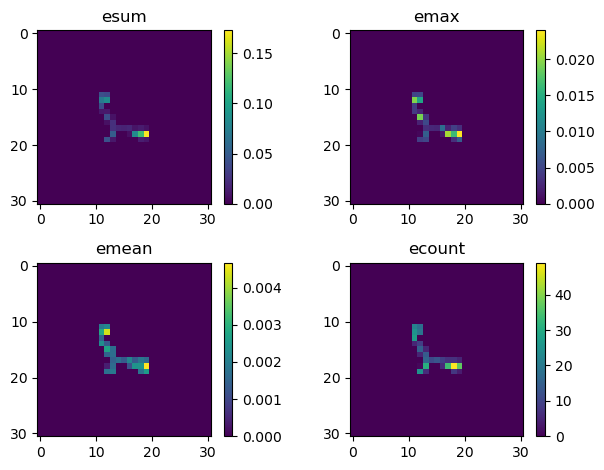

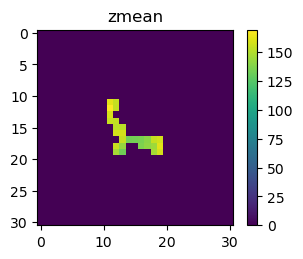

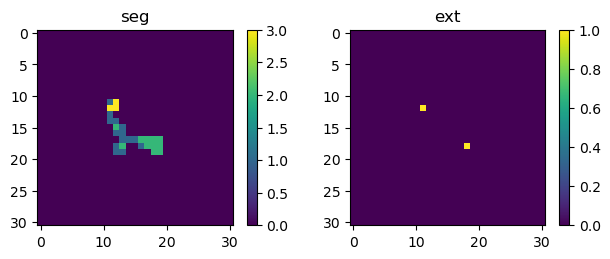

<Figure size 640x480 with 0 Axes>

In [45]:
kk = get_event(idata, ii, idata1)
dp.plot_godata(idata1, kk)

In [50]:
box  = cnn.run(idata, NNType = cnn.GoCNN, ofilename = ofile, nepochs = nepochs, config = config)

Dataset : 
   labels   : ['esum']
   x shape  : (213472, 1, 31, 31)
   y shape  : (213472, 1)
   z labels : ['seg', 'ext']
   z shape  : (213472, 2, 31, 31)

{'loss_function': 'MSELoss'}
Event Image sample size :  213472
Event Image tensor: depth =   1 , width =  31
[200, 1, 31, 31]
[200, 2, 16, 16]
[200, 4, 9, 9]
[200, 8, 6, 6]
[200, 288]
[200, 4]
[200, 1]
CNN : 
   [200, 1, 31, 31] => [200, 2, 16, 16] => [200, 4, 9, 9]=> [200, 8, 6, 6] => [200, 288] => [200, 4]
 => [200, 1]

Epoch:  train 9.62e-03 +- 2.84e-02  validation 8.52e-04 +- 1.69e-03
Epoch:  train 9.12e-04 +- 1.75e-03  validation 1.11e-03 +- 1.61e-03
Epoch:  train 4.93e-04 +- 1.29e-03  validation 5.20e-04 +- 1.08e-03
Epoch:  train 5.22e-04 +- 1.35e-03  validation 1.86e-04 +- 7.27e-04
Epoch:  train 3.87e-04 +- 1.20e-03  validation 1.04e-04 +- 6.78e-04
Test  accuracy 99.98
save cnn results at  /scratch/next/data/NEXT100/pressure_topology/xymm/xymm_5bar_xy_10x10_304_temp_cnn_esum.npz


In [ ]:
cnn.plot_roc(box.y, box.yp)

: 

In [5]:
ipath = os.environ['LPRDATADIR']

ifile1 = ipath + 'xymm/' + 'xymm_5bar_xy_10x10_304.npz'
idata1 = dp.godata_load(ifile1)

y   [0]
id  [[720]
 [  9]]


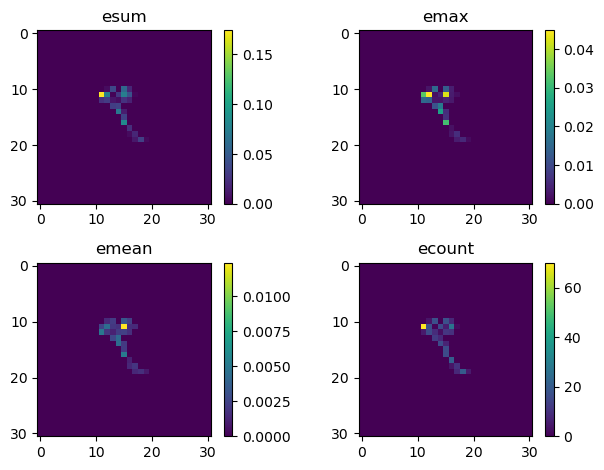

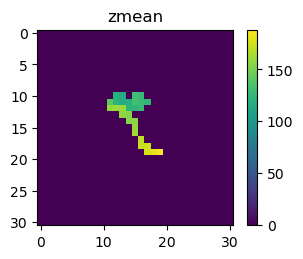

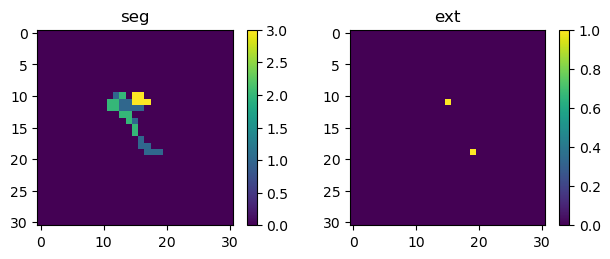

<Figure size 640x480 with 0 Axes>

In [6]:
dp.plot_godata(idata1, 0)

In [7]:
ifile2 = ipath + 'shots/' + '5bar_shuffle_s0mm_w10mm.npz'
idata2 = dp.godata_load(ifile2)

y   0
id  [703  20]


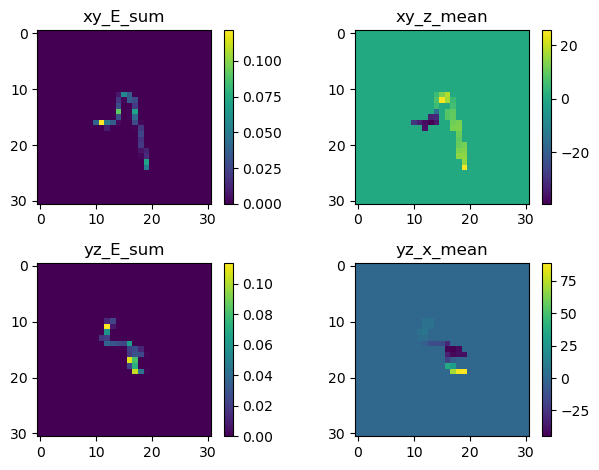

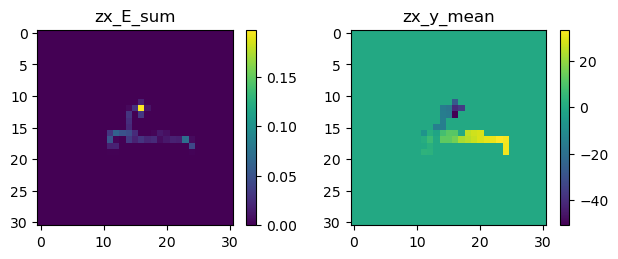

<Figure size 640x480 with 0 Axes>

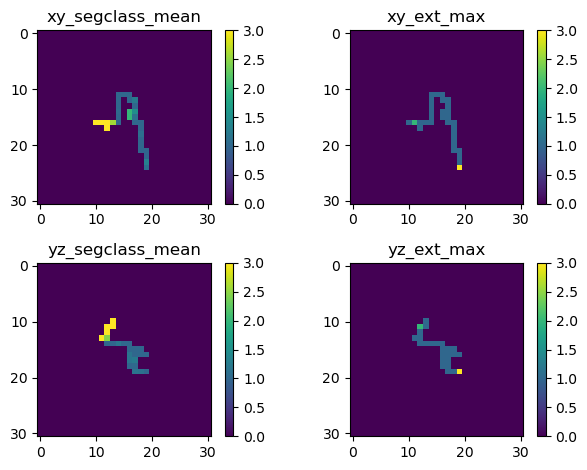

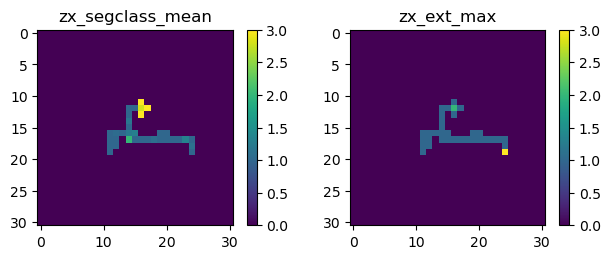

<Figure size 640x480 with 0 Axes>

In [21]:
dp.plot_godata(idata2, 0)

In [2]:
maska = (idata1.y == 1)

NameError: name 'idata1' is not defined

In [17]:
idata2.id[60]

array([172,  58])

In [25]:
m, n = 2, 10
k, f = 4, 2

mycc = cnn.ExtGoCNN(m, n, k, f)

 Conv  : [ 2 ,  10 ] -> [ 4 ,  7 ], ndim =  196 , k =  4
 Conv  : [ 4 ,  7 ] -> [ 8 ,  4 ], ndim =  128 , k =  4
 Conv  : [ 8 ,  4 ] -> [ 16 ,  3 ], ndim =  144 , k =  2
 Conv  : [ 16 ,  3 ] -> [ 32 ,  2 ], ndim =  128 , k =  2
 Lin   :  128  ->  4
 Lin   :  4  ->  1


## Ana CNN

In [26]:
#path       = os.environ['LPRDATADIR']
#ipath      = path + 'xymm/'
#opath      = path + 'cnn/'
#pressure   = '5bar'
projection = ('x', 'y')
#widths     = (10, 10)
#labels     = ['seg',]

idata, odata = cnn.retrieve_cnn_data(ipath, opath, pressure, projection, widths, labels, cnn_name = cnn_name)

data file :  /scratch/next/data/NEXT100/pressure_topology/xymm/xymm_13bar_xy_10x10_100.npz
cnn file  : temp//temp_cnn_esum_xymm_13bar_xy_10x10_100.npz


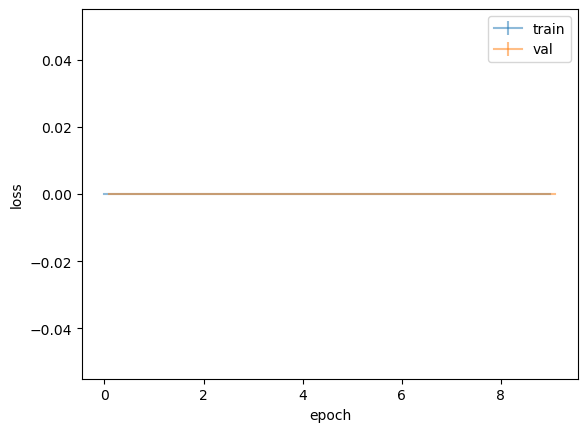

In [27]:
cnn.plot_epochs(odata['epochs'])

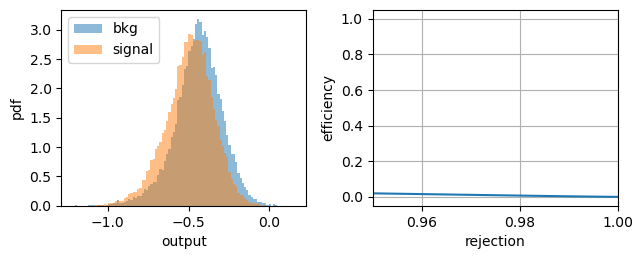

In [28]:
cnn.plot_roc(odata['y'], odata['yp'], 0.95)

event  154094
target test       1
target test pred  0.9983534216880798
success           True
total     test 1.0


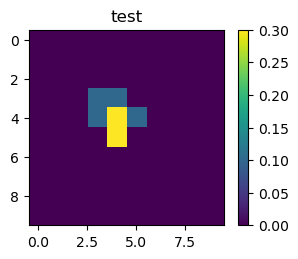

In [22]:
cnn.plot_event(idata, odata, labels)